# Project 1: Wine Dataset - Part 1

### Brief project description

In this project, we leverage the wine-quality dataset to construct a simple deep learning model aimed at classifying wine quality through physicochemical tests. Furthermore, we conduct a parametric experiment, testing various batch sizes and comparing their accuracy. Finally, we evaluate the outcomes derived from the experiment.

The dataset and a detailed description of the variables can be found at the following URL: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

from sklearn.model_selection import train_test_split

import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Import and process the data

In [2]:
# the source from which we imported the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

data = pd.read_csv(url,sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# display some basic properties of the imported data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# display some basic statistical properties of the imported data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Exploratory data analysis

In [5]:
# check for duplicates
print(f'Number of duplicated rows before: {data.duplicated().sum()}')
print(' ')

# display duplictes
display(data.loc[data.duplicated(),:].head())

# remove duplicates
data.drop_duplicates(inplace=True)
print(' ')

print(f'Number of duplicated rows after: {data.duplicated().sum()}')

Number of duplicated rows before: 240
 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.9978,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.9962,3.41,0.39,10.9,5


 
Number of duplicated rows after: 0


In [6]:
# list number of unique values per column
for i in data.keys():
    print(f'{i} has {len(np.unique(data[i]))} unique values')

fixed acidity has 96 unique values
volatile acidity has 143 unique values
citric acid has 80 unique values
residual sugar has 91 unique values
chlorides has 153 unique values
free sulfur dioxide has 60 unique values
total sulfur dioxide has 144 unique values
density has 436 unique values
pH has 89 unique values
sulphates has 96 unique values
alcohol has 65 unique values
quality has 6 unique values


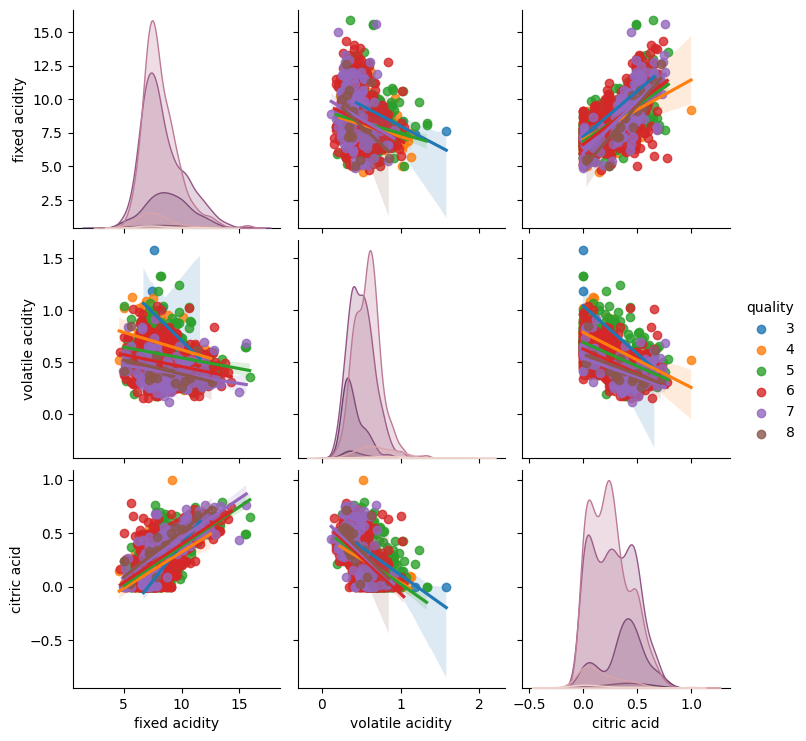

In [7]:
# pairwise plot
cols2plot = ['fixed acidity', 'volatile acidity','citric acid','quality']
sns.pairplot(data[cols2plot],kind='reg', hue='quality')

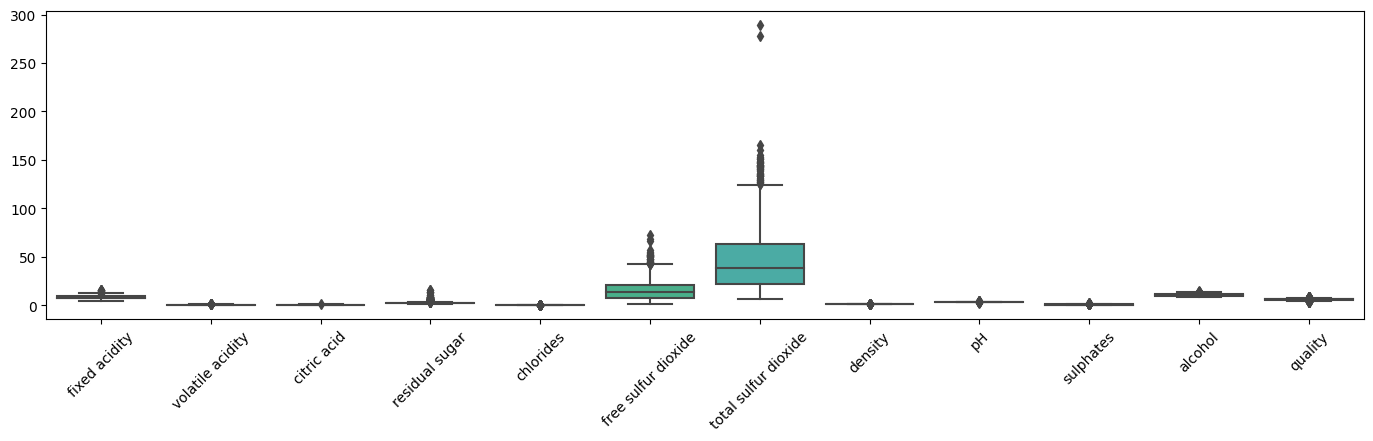

In [8]:
# Create a boxplot to detect outliers
fig, ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

# remove rows with outliers
data = data[data['total sulfur dioxide']<200]

In [9]:
### z-score all variables except for quality

# find the columns we want to normalize (all except quality)
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop('quality')

# z-score (written out for clarity)
for col in cols2zscore:
    meanval = np.mean(data[col])
    stdev = np.std(data[col],ddof=1)
    data[col] = (data[col]-meanval)/stdev

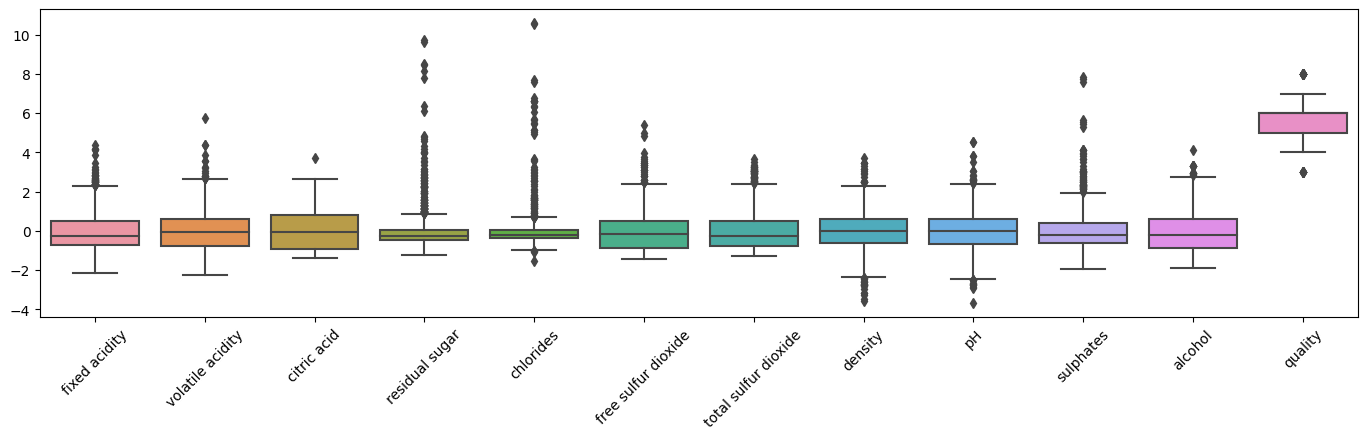

In [10]:
# Create a boxplot to control outlier removal
fig, ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

# remove rows with outliers
data = data[data['total sulfur dioxide']<200]

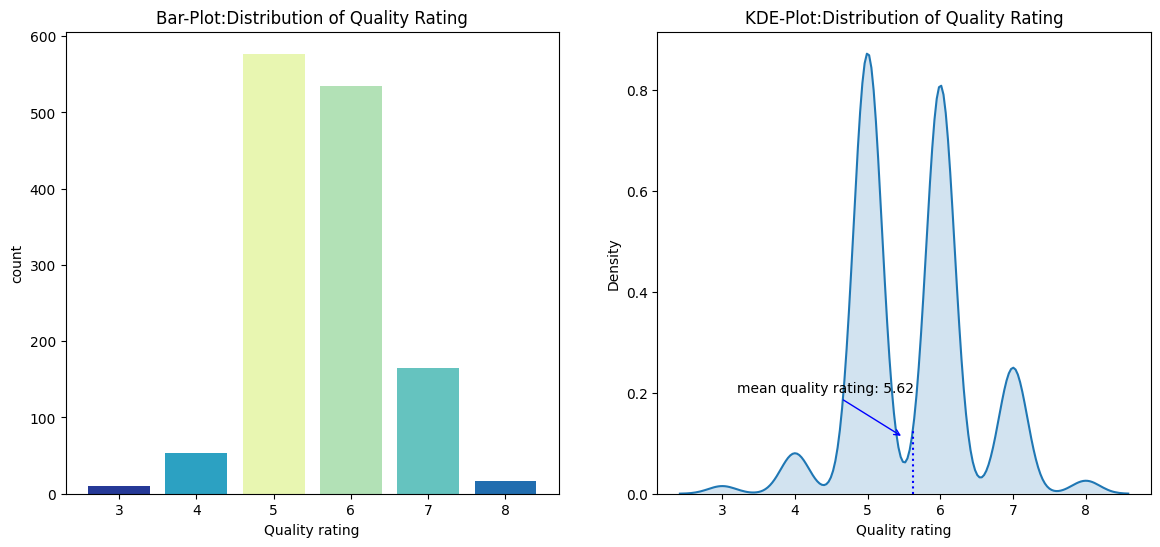

In [11]:
# distribution quality values
fig = plt.figure(figsize=(14,6))


plt.subplot(1,2,1)
counts = data['quality'].value_counts()
plt.bar(counts.keys(), counts,color=sns.color_palette('YlGnBu'))
plt.xlabel('Quality rating')
plt.ylabel('count')
plt.title('Bar-Plot:Distribution of Quality Rating')


# create a kde-plot
plt.subplot(1,2,2)
ax = sns.kdeplot(data=data,x='quality')

# get the x and y coordinates and the mean value
kdeline = ax.lines[0]

xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

mean = np.mean(data['quality'])

# calculate the hight of the KDE-plot at the mean
height = np.interp(mean,xs,ys)
ax.vlines(mean,0, height, color='blue', ls=':')
ax.fill_between(xs ,0, ys, alpha=0.2)
plt.xlabel('Quality rating')
plt.title('KDE-Plot:Distribution of Quality Rating')

# annotate the KDE-plot
plt.annotate(
    'mean quality rating: ' + str(np.round(mean,decimals=2)),
    xy=(mean, 0.1),
    xytext=(3.2, 0.2),
    arrowprops=dict(arrowstyle='->', color='blue', shrinkB=10));



plt.show()

In [12]:
# create a new column for binarized (boolean) quality
data['boolQuality'] = 0

# data['boolQuality'][data['quality']<6] = 0 # implicit in the code! just here for clarity
data['boolQuality'][data['quality']>5] = 1

data[['quality','boolQuality']]

,quality,boolQuality
0,5,0
1,5,0
2,5,0
3,6,1
5,5,0
...,...,...
1593,6,1
1594,5,0
1595,6,1
1597,5,0


### Correlation between the feature and target variables

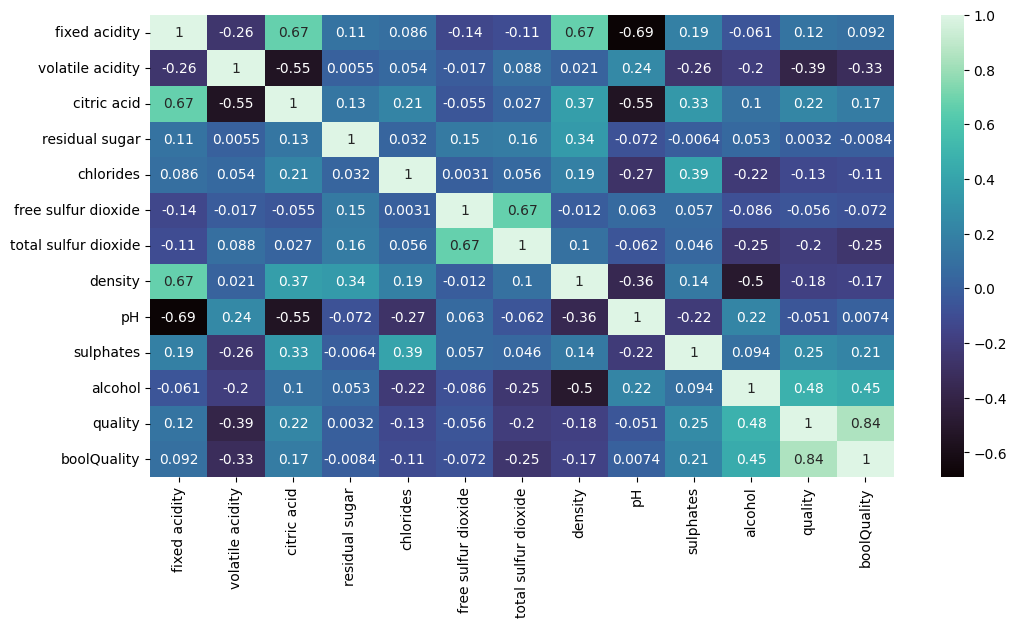

In [13]:
# calculate the correlation between the features and target
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot=True,cmap='mako')
plt.show()

### Re-organize the data: train/test in DataLoaders

In [14]:
## convert from pandas dataframe to tensor
dataT = torch.tensor(data.drop(['quality','boolQuality'], axis=1).values).float()
labels = torch.tensor(data['boolQuality'].values,dtype=torch.long)

print(dataT.shape)
print(labels.shape)

torch.Size([1357, 11])
torch.Size([1357])


In [15]:
def createDataLoader(batchsize):
    # use sklearn to split the data
    train_data, test_data, train_labels, test_labels = train_test_split(dataT,labels,test_size=0.2)

    # convert them into PyTorch datasets
    train_data = TensorDataset(train_data,train_labels)
    test_data = TensorDataset(test_data,test_labels)

    # finally translate them into PyTorch dataloader objects
    train_loader = DataLoader(train_data,batch_size=int(batchsize),shuffle=True, drop_last=True)
    test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])
    
    return train_loader, test_loader

### Specify the model architecture and training plan

In [16]:
def CreateANewModel():
    
    # model architecture
    ANNwine = nn.Sequential(
        nn.Linear(11,64),
        nn.ReLU(),
        nn.Linear(64,64),
        nn.ReLU(),
        nn.Linear(64,2)) 
    
    # loss function
    lossfun = nn.CrossEntropyLoss()
    
    # optimizer
    optimizer = torch.optim.SGD(ANNwine.parameters(),lr=.01)
    
    return ANNwine, lossfun, optimizer

In [17]:
# explore the model in more detail
tmpmodel = CreateANewModel()[0]

# print the model architecture
print(tmpmodel)

# print the model's parameters
for i in tmpmodel.named_parameters():
  print(i[0],i[1].shape,i[1].numel())

Sequential(
  (0): Linear(in_features=11, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=2, bias=True)
)
0.weight torch.Size([64, 11]) 704
0.bias torch.Size([64]) 64
2.weight torch.Size([64, 64]) 4096
2.bias torch.Size([64]) 64
4.weight torch.Size([2, 64]) 128
4.bias torch.Size([2]) 2


### Train the model

In [18]:
# the global parameter
numepochs = 500

def trainTheModel():
    
    # initalize accuracies as empties
    train_Acc = []
    test_Acc = []
    losses = []
    
    # loop over epochs 
    for epochi in range(numepochs):
        
        # activate training mode
        ANNwine.train()
        
        # loop over traing data batches
        batchAcc = []
        batchLoss = []
        
        for X,y in train_loader:
            
            # foward pass and loss
            yHat = ANNwine(X)
            loss = lossfun(yHat,y)
            
            # backprob
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # compute the training accuracy just for this batch
            batchAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )
            batchLoss.append(loss.item())
            # end of batch loop...
            
        # now we have trained through the batches, get their avarage training accuracy
        train_Acc.append(np.mean(batchAcc))
        losses.append(batchLoss)
        
        ### test accuracy
        
        # extract X,y from the test_dataloader
        x,y = next(iter(test_loader))
        
        # activate the tessting mode
        ANNwine.eval()
        with torch.no_grad():
            predlabels = torch.argmax(ANNwine(x), axis=1)

        # compute accuracy
        test_Acc.append( 100*torch.mean((predlabels == y).float()).item() )
        
    # function output
    return train_Acc, test_Acc, losses       

## Run the experiment and visualize the results

In [19]:
# range batch size
batchsizes = 2**np.arange(1,7)

# initialize the output result matrices
accuracyResultsTrain = np.zeros((numepochs, len(batchsizes)))
accuracyResultsTest = np.zeros((numepochs, len(batchsizes)))

# loop over batch sizes
for bi in range(len(batchsizes)):
    
    # create train_loader and test_loader
    train_loader, test_loader  = createDataLoader(batchsizes[bi])
    
    # creat and train a model
    ANNwine, lossfun, optimizer = CreateANewModel()
    trainAcc, testAcc, losses = trainTheModel()
    
    # store the results
    accuracyResultsTrain[:,bi] = trainAcc
    accuracyResultsTest[:,bi] = testAcc


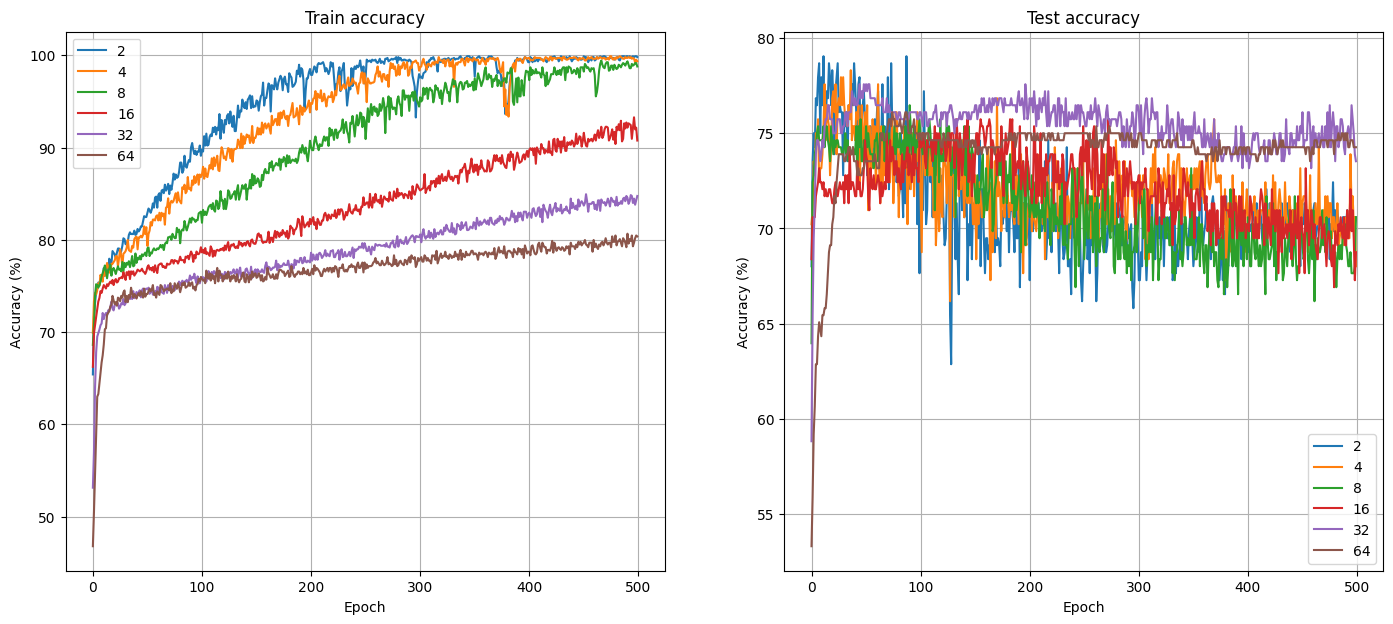

In [20]:
# plot the train and test accuracy
fig, ax = plt.subplots(1,2, figsize=(17,7))

ax[0].plot(accuracyResultsTrain)
ax[0].set_title('Train accuracy')
ax[1].plot(accuracyResultsTest)
ax[1].set_title('Test accuracy')

for i in range(0,2):
    ax[i].legend(batchsizes)
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel('Accuracy (%)')
    ax[i].grid()
    
plt.show()    